## Финальный проект - Сегментация пользователей банка

Я начинающий аналитик, проходящий испытательный срок в банке «Метанпромбанк». Последние месяцы банк терпит поражение в борьбе за клиентов, поэтому перед аналитиками поставлена задача найти потенциальные сегменты, на которые нужно воздействовать, чтобы снизить отток.

### Описание данных:
/datasets/bank_scrooge.csv

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

USERID — идентификатор пользователя,

score — баллы кредитного скоринга,

city — город,

gender — пол,

age — возраст,

equity — количество баллов собственности

balance — баланс на счёте,

products — количество продуктов, которыми пользуется клиент,

credit_card — есть ли кредитная карта,

last_activity — активный клиент,

EST_SALARY — оценочный доход клиента,

сhurn — признак оттока.

### Шаг 1 - Загрузка данных и подготовка к исследованию

In [1]:
# импортируем необходимые библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from scipy import stats as st
import numpy as np
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings("ignore")

In [2]:
# импортируем данные
banki = pd.read_csv('/datasets/bank_scrooge.csv')
banki.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [3]:
# первичные сведения о данных
banki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
# убираем заглавные буквы в названиях колонок
banki.columns = banki.columns.str.lower()

In [5]:
# определяем количество дубликатов в исходном датафрейме
print('Количество дубликатов в датафрейме =', banki.duplicated().sum())

Количество дубликатов в датафрейме = 0


In [6]:
# определяем количество дубликатов в исходном датафрейме
print('Количество дубликатов в датафрейме по категории userid =', banki['userid'].duplicated().sum())

Количество дубликатов в датафрейме по категории userid = 73


In [7]:
# сохраняем дублицирующиеся номера клиентов 
dublicates = list(banki[banki['userid'].duplicated() == True]['userid'].unique())

In [8]:
# определяем есть ли одинаковые строки среди дубликатов если не рассматривать данные в userid
banki.query('userid in @dublicates').loc['score':'churn'].duplicated().sum()

0

In [9]:
# рассмотрим дубликаты
banki.query('userid in @dublicates').sort_values(by='userid').head(60)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


In [10]:
# проверим предположение, что в них представлены только клиенты 2-х отделений
banki.query('userid in @dublicates')['city'].unique()

array(['Ярославль', 'Рыбинск'], dtype=object)

In [11]:
# посчитаем количество клиентов каждого офиса
banki.query('userid in @dublicates').groupby('city')['city'].agg('count')

city
Рыбинск      73
Ярославль    73
Name: city, dtype: int64

Данные в дублицирующихся по userid строках содержат данные совершенно разных клиентов из 2-х офисов. Видимо в офисах банка userid присваиваются независимо и могут быть повторы при сведении данных из разных баз в единый файл. 

In [12]:
# определяем количество пропусков в исходном датафрейме
banki.isna().sum()

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [13]:
# посмотрим на клиентов с отсутствующим значением возраста
banki[banki['age'].isna()]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


In [14]:
# выведем уникальные значения возраста в датасете
print(*sorted(list(banki['age'].unique())))

18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0 61.0 62.0 63.0 64.0 65.0 66.0 67.0 68.0 69.0 70.0 71.0 72.0 73.0 74.0 75.0 76.0 77.0 78.0 79.0 80.0 nan 81.0 82.0 83.0 84.0 86.0


In [15]:
# посмотрим могут ли быть пропуски взязаны с отсутствующим возрастом 85 лет
banki.query('age > 80')['age'].value_counts()

81.0    4
83.0    3
84.0    2
82.0    2
86.0    2
Name: age, dtype: int64

Предположение, что эти пропуски могут быть связаны с отсутствующим возрастом не подтвердилось. Людей старше 80 не так много в датасете.

In [16]:
# посмотрим на статистические данные этих клиентов
banki[banki['age'].isna()].describe().T

,count,mean,std,min,25%,50%,75%,max
userid,26.0,1.946375e+05,3.131055e+04,127440.00,185142.0000,208447.000,219224.250,228075.00
score,26.0,8.551538e+02,8.341832e+01,663.00,827.5000,888.500,919.250,942.00
age,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
equity,26.0,1.384615e+00,1.961161e+00,0.00,0.0000,0.000,3.000,5.00
balance,10.0,1.250034e+06,2.265235e+06,171510.23,252326.7725,417361.115,1039439.005,7601719.20
products,26.0,1.346154e+00,5.615911e-01,1.00,1.0000,1.000,2.000,3.00
credit_card,26.0,7.692308e-01,4.296689e-01,0.00,1.0000,1.000,1.000,1.00
last_activity,26.0,7.692308e-01,4.296689e-01,0.00,1.0000,1.000,1.000,1.00
est_salary,26.0,1.785852e+05,1.751356e+05,55073.63,77807.7600,142598.860,176991.690,922080.25
churn,26.0,3.846154e-02,1.961161e-01,0.00,0.0000,0.000,0.000,1.00


Не удается установить закономерность, с которой может быть связано отсутствие возраста в данных у клиентов. Видимо они были пропущены при заполнении анкетных данных клиентов.

In [17]:
# посмотрим на статистические данные клиентов с отсутствующим балансом
missed_balance = banki[banki['balance'].isna()]
missed_balance.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,2295.0,172069.447930,33337.084589,114182.00,143095.5,172659.00,201551.000,229145.00
score,2295.0,865.352070,89.603091,642.00,871.0,903.00,922.000,990.00
age,2279.0,42.093023,11.941551,18.00,33.0,40.00,49.000,86.00
equity,2295.0,0.050980,0.225872,0.00,0.0,0.00,0.000,3.00
balance,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
products,2295.0,1.162092,0.402532,0.00,1.0,1.00,1.000,3.00
credit_card,2295.0,0.815686,0.387824,0.00,1.0,1.00,1.000,1.00
last_activity,2295.0,0.549455,0.497657,0.00,0.0,1.00,1.000,1.00
est_salary,2295.0,226310.208654,199771.793737,20274.03,120347.7,174160.68,240014.995,1333687.36
churn,2295.0,0.005664,0.075066,0.00,0.0,0.00,0.000,1.00


In [18]:
# сравним с теми, где баланс присутствует
banki[~banki['balance'].isna()].describe().T

,count,mean,std,min,25%,50%,75%,max
userid,7705.0,171738.837508,3.381978e+04,94561.0,142639.00,172740.0,201168.00,2.291360e+05
score,7705.0,843.739260,5.533216e+01,689.0,801.00,840.0,882.00,1.000000e+03
age,7695.0,42.924366,1.224401e+01,18.0,33.00,40.0,52.00,8.600000e+01
equity,7705.0,3.395068,1.584477e+00,0.0,2.00,4.0,5.00,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.2,980705.85,1.191136e+08
products,7705.0,2.080986,7.572310e-01,1.0,2.00,2.0,2.00,5.000000e+00
credit_card,7705.0,0.640104,4.800009e-01,0.0,0.00,1.0,1.00,1.000000e+00
last_activity,7705.0,0.515769,4.997837e-01,0.0,0.00,1.0,1.00,1.000000e+00
est_salary,7705.0,124501.872366,1.046635e+05,2546.3,67551.81,106222.2,155045.67,1.395064e+06
churn,7705.0,0.234523,4.237278e-01,0.0,0.00,0.0,0.00,1.000000e+00


У клиентов с пропущенным значением баланса практически отсутствует отток, практически ни у кого нет собственности (equity 0,05), большинство имеют лишь 1 банковский продукт, более 80% имеют кредитную карту и достаточно высокий уровень дохода и кредитного скоринга. Скорее всего эти клиенты имеют кредитный продукт - например, ипотечный. Возможно у этого продукта не предусмотрено этой категории данных.

In [19]:
# зададим пол в бинарном виде с помощью функций
def gender_male(gender):
    """
    Задаем 1 для мужчин
    """
    if gender == "М":
        return 1
    else:
        return 0
    

def gender_female(gender):
    """
    Задаем 1 для женщин
    """
    if gender == "Ж":
        return 1
    else:
        return 0

In [20]:
# создаем бинарные колонки для мужчин и женщин
banki['gender_male'] = banki['gender'].apply(gender_male)
banki['gender_female'] = banki['gender'].apply(gender_female)

In [21]:
# зададим города в бинарном виде с помощью функций
def city_Yaroslavl(city):
    """
    Задаем 1 для Ярославля
    """
    if city == "Ярославль":
        return 1
    else:
        return 0

    
def city_Rostov(city):
    """
    Задаем 1 для Ростова
    """
    if city == "Ростов":
        return 1
    else:
        return 0
    

def city_Rybinsk(city):
    """
    Задаем 1 для Рыбинска
    """
    if city == "Рыбинск":
        return 1
    else:
        return 0

In [22]:
# создаем бинарные колонки для 3 городов
banki['city_yaroslavl'] = banki['city'].apply(city_Yaroslavl)
banki['city_rostov'] = banki['city'].apply(city_Rostov)
banki['city_rybinsk'] = banki['city'].apply(city_Rybinsk)
banki.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_male,gender_female,city_yaroslavl,city_rostov,city_rybinsk
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,0,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,0,1
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,1,1,0,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1,0,1,0,0


**Вывод шага 1**:

- Данные о клиентах банка были успешно загружены. Имеем датасет размером 10000 х 12. 

- В таблице нет явных дубликатов, но есть дублирующиеся идентификаторы пользователей (73 дубля). Сделано предположение, что это разные клиенты двух отделений банка и их данные были сохранены в датасете.

- Есть пропуски в столбце возраст и баланс на счете. По пропускам возраста не удалось выявить закономерности, а по пропускам в балансе сделано предположение, что это может быть связано с особенностями одного из продуктов банка. Все данные были оставлены в датасете.

- Добавлены колонки для категорий пол и город в бинарной форме.

### Шаг 2 - Исследовательский анализ данных

In [23]:
# посмотрим на статистические данные цифровых параметров датасета
banki.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,10000.0,171814.712600,3.370824e+04,94561.0,142810.25,172728.000,201261.7500,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,802.00,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.00,40.000,51.0000,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.00,3.000,4.0000,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.200,980705.8500,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.00,2.000,2.0000,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.00,1.000,1.0000,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.00,1.000,1.0000,1.000000e+00
est_salary,10000.0,147866.885544,1.393885e+05,2546.3,75251.90,119658.105,174500.5425,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.00,0.000,0.0000,1.000000e+00


**Сделаем несколько первичных выводов**:

- баллы кредитного скоринга представлены в диапазоне 642 - 1000, средний 849, медианный 853
- возраст клиентов банка находится в диапазоне 18 - 86 лет
- количество баллов собственности находится в диапазоне 0 - 9, средний 2,6, медианный 3
- баланс клиентов варьируется от 0 до 119 миллионов, средний 828 тысяч, медианный 524 тысячи (заметно влияние выбросов)
- количество используемых продуктов банка от 0 до 5, в среднем 1,87, медиана 2
- у 68% клиентов есть кредитная картой банка
- только 52% клиентов проявляли активность за последний месяц
- оценочный доход клиента варьируется от 2500 до 1395000, средний 148 тысяч, медианный 120 тысячи (заметно влияние выбросов)
- показатель оттока клиентов по банку составляет 18,2%
- мужчины и женщины представлены в равных пропорциях
- 59% клиентов обслуживаются в Ярославле, 14% - в Ростове и 27% в Рыбинске

Составим и сравним портреты типичного лояльного клиента банка и клиента, покидающего банк

In [24]:
portret = banki.groupby('churn').agg({'balance' : 'median', 'est_salary' : 'median', 'score' : 'mean','age' : 'mean',
                                      'equity' : 'mean','products' : 'mean','credit_card' : 'mean','last_activity' : 'mean',
                                      'churn' : 'mean','gender_male' : 'mean','gender_female' : 'mean',
                                      'city_yaroslavl' : 'mean', 'city_rostov' : 'mean','city_rybinsk' : 'mean' }).T
portret.columns = ['Лояльный клиент', 'Отточный клиент']
portret

,Лояльный клиент,Отточный клиент
balance,475382.445000,782410.470000
est_salary,118257.715000,125390.620000
score,845.428362,863.401099
age,43.020846,41.450247
equity,2.374817,3.763736
products,1.757579,2.375824
credit_card,0.709169,0.551099
last_activity,0.483741,0.702198
churn,0.000000,1.000000
gender_male,0.467237,0.650000


**Сделаем несколько выводов**:

- средний балл кредитного скоринга выше у тех, кто решил покинуть банк - 863 против 845
- средний возраст лояльных клиентов 43 года, у покидающих банк 41,5 лет
- количество баллов собственности выше у уходящих клиентов - 3,8 против 2,4 у лояльных
- средний баланс лояльного клиента 475 тысяч, а у покидающего банк 782 тысячи
- среднее количество используемых продуктов у лояльных клиентов 1,8 против 2,4 у отточных
- у 71% лояльных клиентов есть кредитная картой банка против 55% у отточных клиентов
- только 48% лояльных клиентов проявляли активность за последний месяц против 70% у покидающих банк
- средний ориентировочный доход у лояльного 118 тысяч, а у покадающих банк 125 тысяч
- мужчины и женщины представлены примерно в равных пропорциях у лояльных клиентов, а вот среди уходящих 65% это мужчины
- доли лояльных и отточных клиентов примерно одинаково представлены в отделениях банка

In [25]:
def num_graphs(df, column, title):
    """
    Строим графики для непрерывных величин: нормированные гистограммы и диаграммы размаха
    """
    fig, ax = plt.subplots(figsize = (12, 4))
    
    sns.histplot(data=df, x=column, hue='churn', common_norm=False, kde=True, stat='density',
                 ax=plt.subplot(1, 2, 1), palette='bright')
    plt.title('');
    plt.xlabel(title)
    plt.ylabel('density', rotation=90)
    plt.grid(True)
    
    sns.boxplot(y=column, x='churn', data=df, ax=plt.subplot(1, 2, 2), palette='bright') 
    plt.xlabel('')
    plt.ylabel(title)
    plt.xticks(np.arange(2), ('Лояльные клиенты', 'Отточные клиенты'))
    
    fig.suptitle(title)
    plt.show()

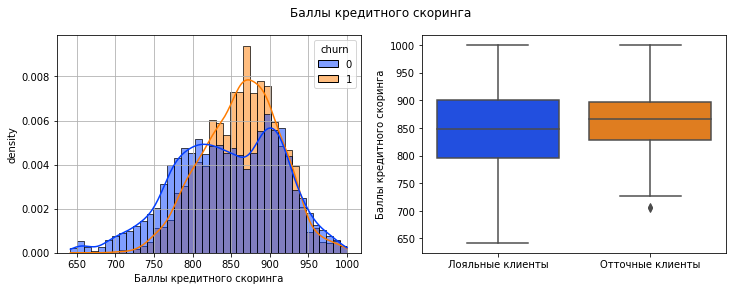

In [26]:
num_graphs(banki, 'score', 'Баллы кредитного скоринга')

Клиенты с баллами кредитного скоринга от 650 до 820 лояльны банку, а с 830 - 900 склонны покидать банк

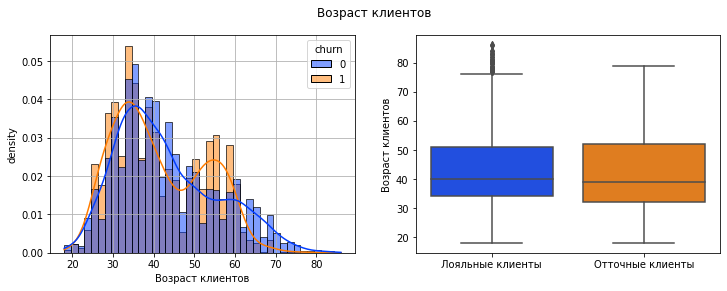

In [27]:
num_graphs(banki, 'age', 'Возраст клиентов')

Клиенты в возрасте от 35 до 50 лет и от 60 до 85 лет - лояльны банку, а в возрасте от 25 до 35 лет и от 50 до 60 лет - склонны покидать банк

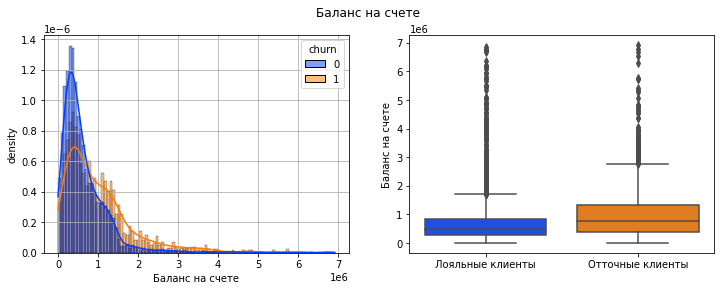

In [28]:
num_graphs(banki.query('balance < 7000000'), 'balance', 'Баланс на счете')

Клиенты с балансом на счете от 0 до 800 тысяч - лояльны банку, а с балансом более чем 1200000 - склонны покидать банк

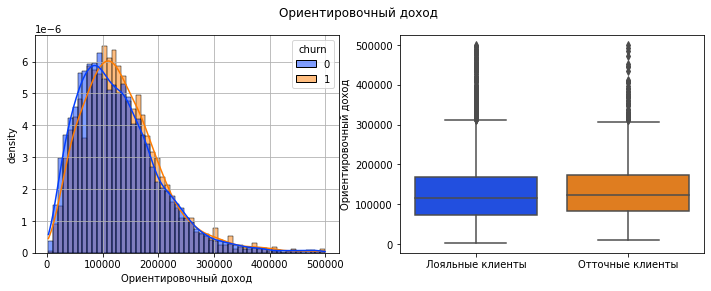

In [29]:
num_graphs(banki.query('est_salary < 500000'), 'est_salary', 'Ориентировочный доход')

Клиенты с ориентировочным доходом от 0 до 80 тысяч - лояльны банку, а с доходом от 100000 до 200000 - склонны покидать банк

In [30]:
def category_graphs(df, column, title, x_label):
    """
    Строим графики для относительных величин по категориям: столбчатые диаграммы
    """
    fig, ax = plt.subplots( figsize=(10, 5))
    sns.despine(left=False, ax=ax)
    sns.barplot(data=df, x=column, y="churn", color="lightskyblue", ax=ax)
    ax.grid( color='grey', lw=0.25)
    ax.set_title(title)
    plt.xlabel(x_label)
    plt.ylabel('Доля оттока', rotation=90)
    plt.show();

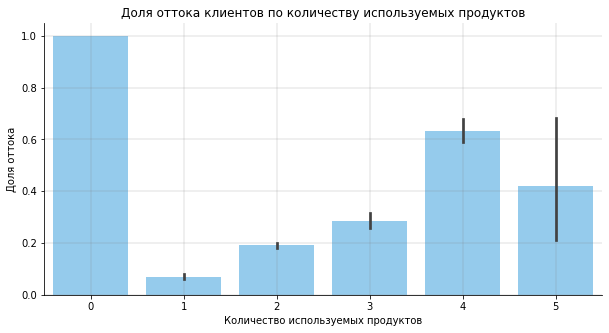

In [31]:
category_graphs(banki, 'products', 'Доля оттока клиентов по количеству используемых продуктов', 'Количество используемых продуктов')

Чем большим числом продуктов пользуются клиенты, тем выше отток.

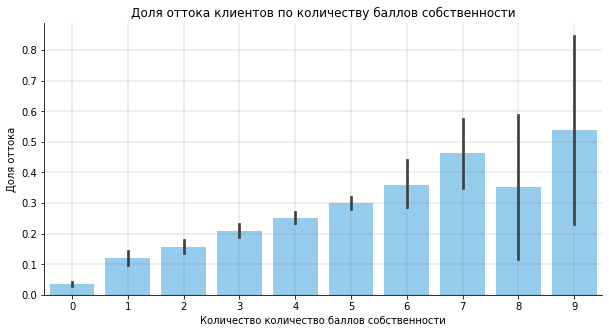

In [32]:
category_graphs(banki, 'equity', 'Доля оттока клиентов по количеству баллов собственности', 'Количество количество баллов собственности')

Чем больше количество баллов собственности имеют клиенты, тем выше отток.

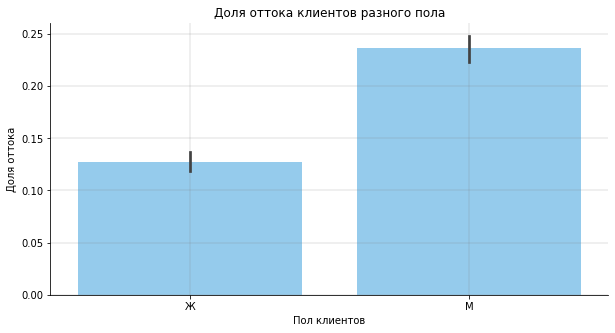

In [33]:
category_graphs(banki, 'gender', 'Доля оттока клиентов разного пола', 'Пол клиентов')

Мужчины склонны покидать банк чаще женщин

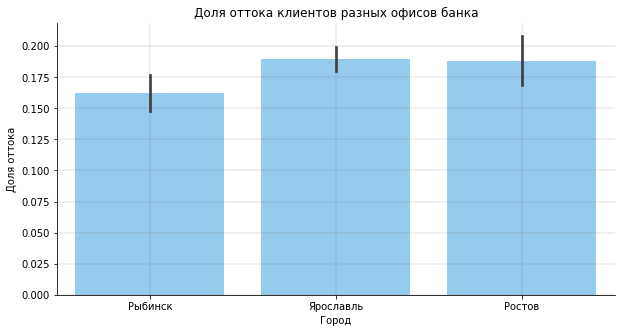

In [34]:
category_graphs(banki, 'city', 'Доля оттока клиентов разных офисов банка', 'Город')

Отток клиентов разных офисов банка примерно одинаков, в Рыбинске этот показатель на пару процентов ниже

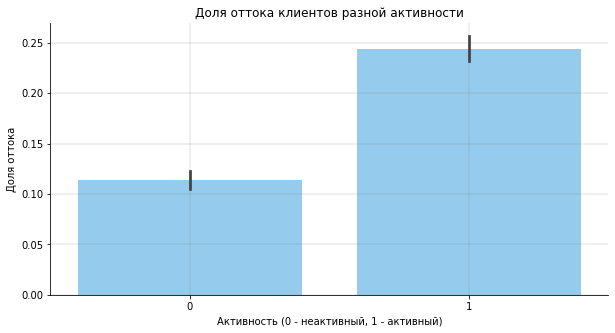

In [35]:
category_graphs(banki, 'last_activity', 'Доля оттока клиентов разной активности', 'Активность (0 - неактивный, 1 - активный)')

Активные клиенты склонны покидать банк чаще

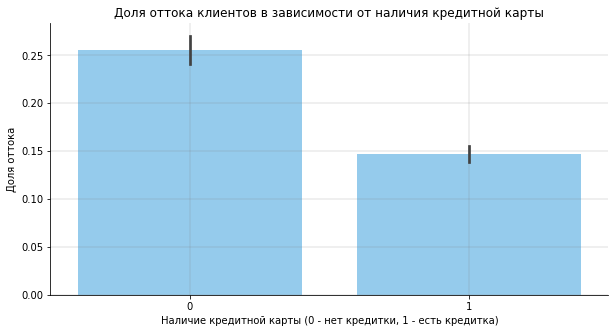

In [36]:
category_graphs(banki, 'credit_card', 'Доля оттока клиентов в зависимости от наличия кредитной карты', 'Наличие кредитной карты (0 - нет кредитки, 1 - есть кредитка)')

Клиенты без кредитной карты склонны покидать банк чаще

**Выводы**:

- Клиенты с баллами кредитного скоринга от 650 до 820 лояльны банку, а с 830 - 900 склонны покидать банк
- Клиенты в возрасте от 35 до 50 лет и от 60 до 85 лет - лояльны банку, а в возрасте от 25 до 35 лет и от 50 до 60 лет - склонны покидать банк
- Клиенты с балансом на счете от 0 до 800 тысяч - лояльны банку, а с балансом более чем 1200000 - склонны покидать банк
- Клиенты с ориентировочным доходом от 0 до 80 тысяч - лояльны банку, а с доходом от 100000 до 200000 - склонны покидать банк
- Чем большим числом продуктов пользуются клиенты, тем выше отток.
- Чем больше количество баллов собственности имеют клиенты, тем выше отток.
- Мужчины склонны покидать банк чаще женщин
- Отток клиентов разных офисов банка примерно одинаков, в Рыбинске этот показатель на пару процентов ниже
- Активные клиенты склонны покидать банк чаще
- Клиенты без кредитной карты склонны покидать банк чаще

**Корреляционный анализ**

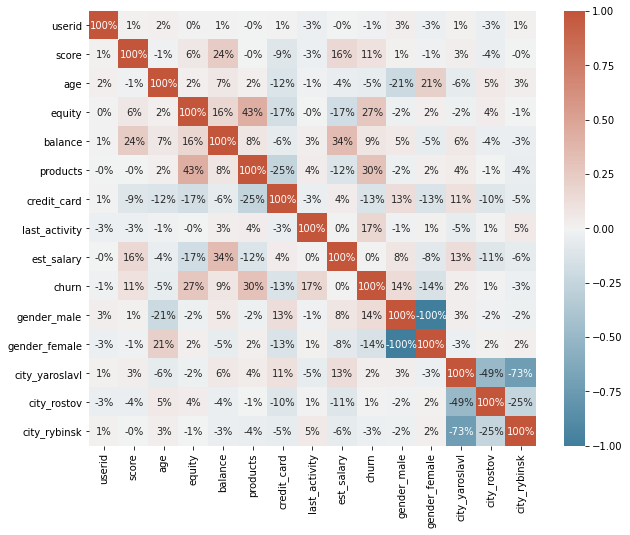

In [38]:
# построим матрицу корреляции
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(banki.corr() , cmap=cmap, annot=True, fmt=".0%")

Наибольшая линейная положительная корреляция оттока наблюдается с количество продуктов, далее с количество баллов собственности, с активностью клиента, с мужчинами клиентами, с баллами кредитного скоринга, с балансом на счете. Т.е. отток тем больше, чем выше эти показатели.

Наибольшая линейная отрицательная корреляция оттока наблюдается с женщинами клиентами, с наличием кредитной карты у клиента и возрастом. Т.е. данные категории более лояльны банку.


**Разделение пользователей на основе данных о количестве потребляемых продуктов**

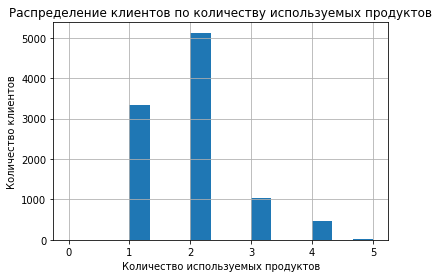

In [39]:
# рассмотрим распределение клиентов по количеству используемых продуктов
banki['products'].plot.hist(bins=15)
plt.title('Распределение клиентов по количеству используемых продуктов');
plt.xlabel('Количество используемых продуктов')
plt.ylabel('Количество клиентов', rotation=90)
plt.grid(True);

In [40]:
# рассмотрим средние показатели клиентов, которые используют разное число продуктов
banki.groupby('products').agg({'balance' : 'median', 'est_salary' : 'median', 'score' : 'mean','age' : 'mean',
                                      'equity' : 'mean','products' : 'mean','credit_card' : 'mean','last_activity' : 'mean',
                                      'churn' : 'mean','gender_male' : 'mean','gender_female' : 'mean',
                                      'city_yaroslavl' : 'mean', 'city_rostov' : 'mean','city_rybinsk' : 'mean'}).T

products,0,1,2,3,4,5
balance,NaN,415369.490000,514916.200000,666336.605000,939342.895000,282262.330000
est_salary,25063.96,142185.240000,109493.960000,105625.840000,122472.510000,106033.790000
score,962.00,854.298114,844.563792,837.307988,878.267932,859.263158
age,79.00,42.196208,42.768900,45.714836,39.782700,36.473684
equity,3.00,1.324753,3.151190,3.518768,4.151899,3.684211
products,0.00,1.000000,2.000000,3.000000,4.000000,5.000000
credit_card,0.00,0.863813,0.625439,0.356112,0.681435,1.000000
last_activity,0.00,0.528285,0.516192,0.416747,0.789030,0.894737
churn,1.00,0.070338,0.190987,0.285852,0.632911,0.421053
gender_male,0.00,0.540856,0.477175,0.430221,0.622363,0.526316


**Выводы**:

- группы с 0 и 5 продуктами нерепрезентативны для анализа из-за малого числа клиентов
- около 85% клиентов используют 1 или 2 продукта банка, причем чуть более половины - лишь 1 продукт
- 1 продукт: клиенты с одним продуктом имеют самый низкий отток (всего 7%!), наимельшее из всех групп количество баллов собственности, наименьший из всех групп баланс на счете, самый высокий уровень наличие кредитки (86% клиентов), при этом самый высокий средний месячный доход
- 2 продукта: имеет средний по банку уровень оттока и средние показатели параметров. 30% клиентов этой группы из Рыбинска
- 3 продукта: 29% оттока, самый низкий показатель баллов кридитного скоринга, самый высокий средний возраст 45 лет, самый низкий уровень наличия кредитки (35% клиентов), в группе больше женщин 57% на 43%, большинство клиентов из Ярославля 75%
- 4 продукта: **63% оттока!!!**, самый высокий показатель баллов кридитного скоринга, самый низкий средний возраст 40 лет, самое высокое количество баллов собственности, самый высокий баланс на счете, самый высокий процент активных клиентов (79%), в группе больше мужчин 62% на 38%, большинство клиентов из Ярославля 65%

Построим графики для каждой из 4 групп

In [41]:
# построим нормированные гистограммы для всех групп
def graph_products(param_data, param_x, param_hue, title, kde=True):
    """
    нормированные гистограммы для всех групп
    """
    n = 0
    plt.subplots(figsize=(12, 12))
    for prod in [1, 2, 3, 4]:
        n +=1
        plt.subplot(2, 2, n)
        sns.histplot(data=param_data.query('products == @prod'), x=param_x, hue=param_hue, common_norm=False, kde=kde, 
                         stat='density', palette='bright')
        plt.title(title +' '+ str(prod) + ' группа');
        plt.xlabel(title)
        plt.ylabel('density', rotation=90)
        plt.grid(True);

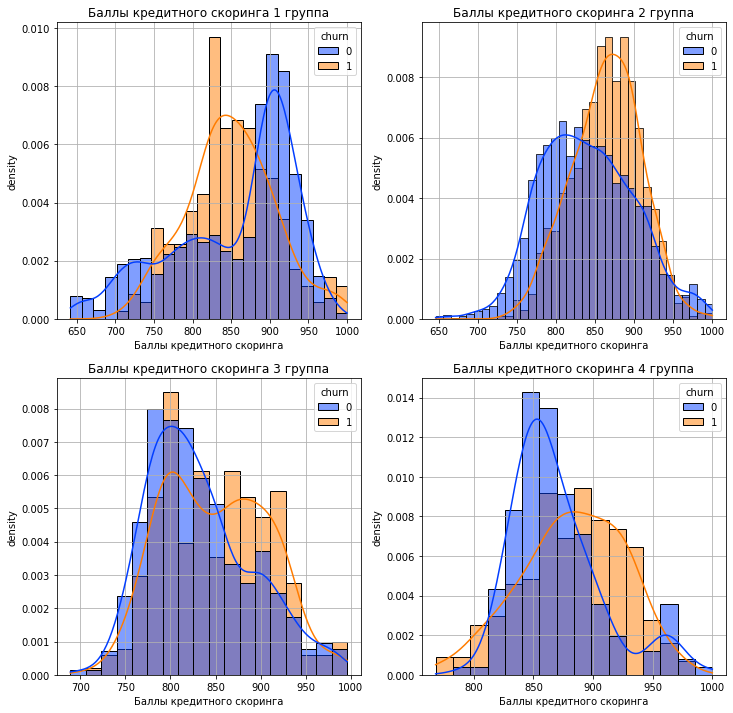

In [42]:
graph_products(banki, 'score', 'churn', 'Баллы кредитного скоринга')

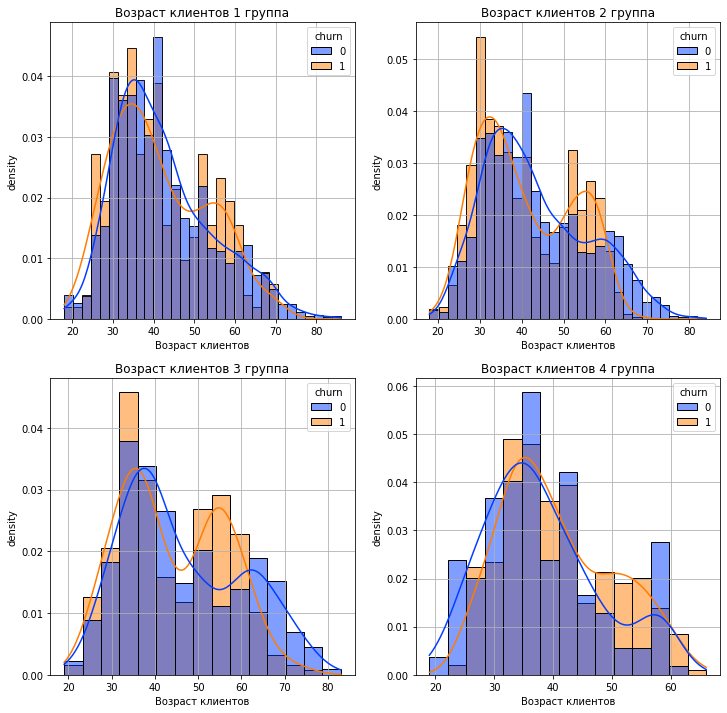

In [43]:
graph_products(banki, 'age', 'churn', 'Возраст клиентов')

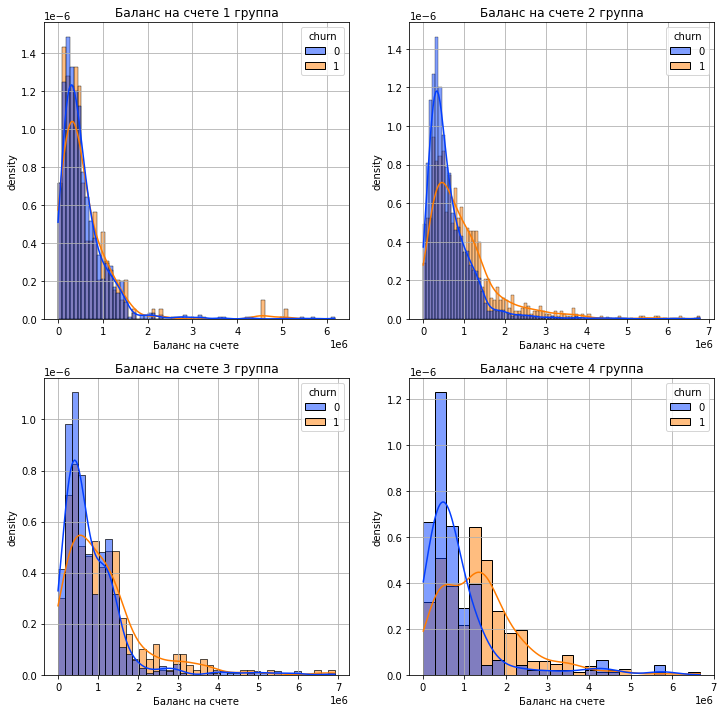

In [44]:
graph_products(banki.query('balance < 7000000'), 'balance', 'churn', 'Баланс на счете')

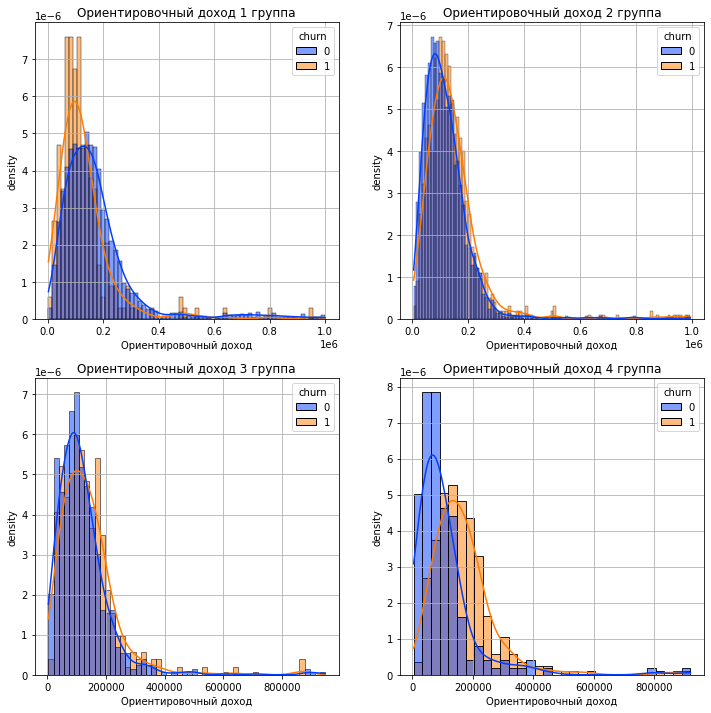

In [45]:
graph_products(banki.query('est_salary < 1000000'), 'est_salary', 'churn', 'Ориентировочный доход')

In [46]:
def category_products_graphs(column, title, x_label):
    """
    Строим графики для относительных величин по категориям по продуктам: тепловые карты оттока
    """
    f, ax = plt.subplots(figsize=(7, 5))
    sns.heatmap(banki.query('products > 0 and products < 5').pivot_table(index='products', 
            columns=column, values='churn', aggfunc='mean'), annot=True, fmt=".0%", cmap='Oranges', vmin=0, vmax=1)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Продукты', rotation=90)
    plt.xticks(rotation=0);
    #plt.grid(True)

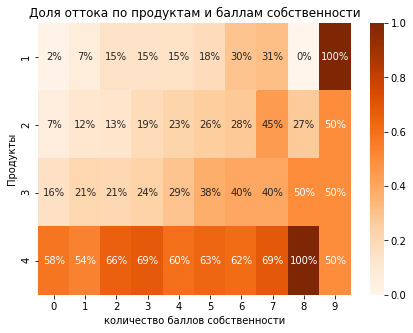

In [47]:
category_products_graphs('equity', 'Доля оттока по продуктам и баллам собственности', 'количество баллов собственности')

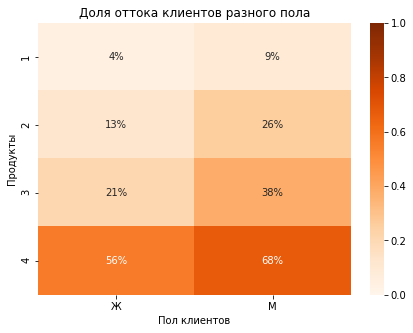

In [48]:
category_products_graphs('gender', 'Доля оттока клиентов разного пола', 'Пол клиентов')

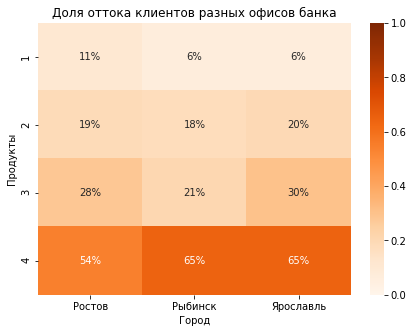

In [49]:
category_products_graphs('city', 'Доля оттока клиентов разных офисов банка', 'Город')

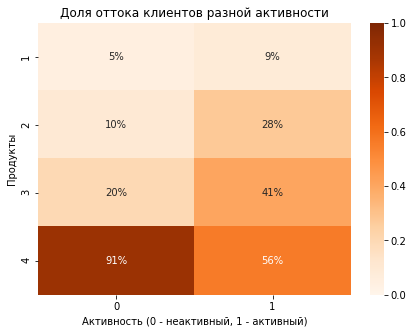

In [50]:
category_products_graphs('last_activity', 'Доля оттока клиентов разной активности', 'Активность (0 - неактивный, 1 - активный)')

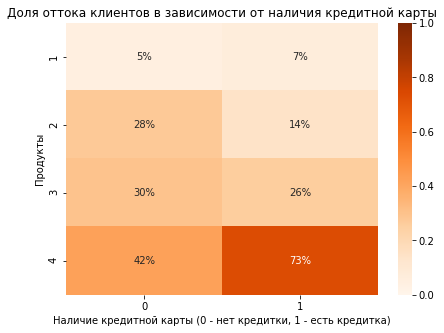

In [51]:
category_products_graphs('credit_card', 'Доля оттока клиентов в зависимости от наличия кредитной карты', 'Наличие кредитной карты (0 - нет кредитки, 1 - есть кредитка)')

**Перечислим набор признаков, имеющих связь с оттоком клиентов**:
1. Количество продуктов банка: 3 и более
2. Баллы кредитного рейтинга более 830
3. Баланс на счете больше 1200000
4. Количество баллов собственности от 4
5. Пол - мужчины 
6. Активные клиенты
7. Клиенты, не имеющие кредитной карты

### Шаг 3 - Проверка статистических гипотез

**Первая гипотеза для проверки**: различие возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые  пользуются одним.

Нулевая гипотеза: нет различия в возрасте между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним
Альтернативная: различие в возрасте есть

Для проверки гипотезы будем использовать t-test для сравнения средних двух выборок.
Этот тест можно применять если:
1. Генеральные совокупности не зависят друг от друга - в нашем случае это так
2. Выборочные средние нормально распределены - согласно ЦПТ выборочные средние нормально распределены вокруг значения, практически равного истинному среднему генеральной совокупности.
3. Дисперсии рассматриваемых генеральных совокупностей равны.

In [52]:
# создаем выборки для теста
gr1=banki.query('products == 1 and not age.isna()')
gr2=banki.query('products == 2 and not age.isna()')

In [53]:
#Нулевая гипотеза: нет различия в возрасте между теми клиентами, которые пользуются двумя продуктами банка, 
# и теми, которые пользуются одним
#Альтернативная: различие в возрасте есть

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(gr1['age'], gr2['age'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.03351546829239861
Отвергаем нулевую гипотезу


Вывод: есть статистически значимое различие в возрасте между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

**Вторая гипотеза для проверки**: различие ориентировочного дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, кто пользуются одним.

Нулевая гипотеза: нет различия в ориентировочном доходе между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Альтернативная: различие в ориентировочном доходе есть

Для проверки гипотезы будем использовать t-test для сравнения средних двух выборок.

In [54]:
#Нулевая гипотеза: нет различия в ориентировочном доходе между теми клиентами, которые пользуются двумя продуктами банка,
# и теми, которые пользуются одним

#Альтернативная: различие в ориентировочном доходе есть

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(gr1['est_salary'], gr2['est_salary'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.0019417690399447e-57
Отвергаем нулевую гипотезу


Вывод: есть статистически значимое различие в в ориентировочном доходе между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним


**Вывод Шага 3**: 
Проверены 2 гипотезы о равенстве возраста и ориентировочного дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним. В обоих случаях есть статистически значимое различие.

### Шаг 4 - Промежуточный вывод о том, на основе каких показателей стоит провести сегментацию клиентов

**Перечислим набор показателей, на основе которых стоит провести сегментацию клиентов**:
1. Количество продуктов банка
2. Баланс на счете 
3. Баллы кредитного рейтинга
5. Пол - мужчины 
6. Активные клиенты

### Шаг 5 - Сегментация клиентов банка по отобранным показателям

На основе проведенного анализа выделим 3 группы клиентов, которые склонны покидать банк.

**1 группа**: клиенты, которые используют 4 банковских продукта

In [55]:
print('Количество клиентов группы = ', banki.query('products == 4')['churn'].count())
print('Доля оттока = ', banki.query('products == 4')['churn'].mean().round(2))

Количество клиентов группы =  474
Доля оттока =  0.63


In [56]:
banki.query('products == 4').describe().T

,count,mean,std,min,25%,50%,75%,max
userid,474.0,1.708699e+05,3.602366e+04,95384.00,141014.7500,171710.000,2.009955e+05,229017.00
score,474.0,8.782679e+02,4.200425e+01,768.00,848.0000,874.000,9.080000e+02,1000.00
age,474.0,3.978270e+01,9.619244e+00,19.00,33.0000,38.000,4.600000e+01,66.00
equity,474.0,4.151899e+00,1.459143e+00,0.00,3.0000,4.000,5.000000e+00,9.00
balance,474.0,1.267821e+06,1.324023e+06,7703.05,461789.8925,939342.895,1.578762e+06,12829755.02
products,474.0,4.000000e+00,0.000000e+00,4.00,4.0000,4.000,4.000000e+00,4.00
credit_card,474.0,6.814346e-01,4.664123e-01,0.00,0.0000,1.000,1.000000e+00,1.00
last_activity,474.0,7.890295e-01,4.084285e-01,0.00,1.0000,1.000,1.000000e+00,1.00
est_salary,474.0,1.487890e+05,1.290163e+05,5043.14,74234.8375,122472.510,1.860838e+05,1048772.81
churn,474.0,6.329114e-01,4.825202e-01,0.00,0.0000,1.000,1.000000e+00,1.00


**2 группа**: клиенты, у которых баланс на счете больше 1400000

In [57]:
print('Количество клиентов группы = ', banki.query('balance > 1400000')['churn'].count())
print('Доля оттока = ', banki.query('balance > 1400000')['churn'].mean().round(2))

Количество клиентов группы =  867
Доля оттока =  0.47


In [58]:
banki.query('balance > 1400000').describe().T

,count,mean,std,min,25%,50%,75%,max
userid,867.0,1.736584e+05,3.552720e+04,96562.00,145547.000,175191.00,204691.000,2.290580e+05
score,867.0,9.038155e+02,4.627758e+01,731.00,880.000,911.00,934.000,1.000000e+03
age,866.0,4.575866e+01,1.135454e+01,23.00,36.000,44.00,55.000,7.800000e+01
equity,867.0,4.335640e+00,9.938197e-01,1.00,4.000,5.00,5.000,9.000000e+00
balance,867.0,3.027855e+06,5.333202e+06,1400879.81,1568279.025,1990371.29,2898550.515,1.191136e+08
products,867.0,2.448674e+00,8.798921e-01,1.00,2.000,2.00,3.000,5.000000e+00
credit_card,867.0,4.752018e-01,4.996729e-01,0.00,0.000,0.00,1.000,1.000000e+00
last_activity,867.0,5.201845e-01,4.998808e-01,0.00,0.000,1.00,1.000,1.000000e+00
est_salary,867.0,2.393387e+05,2.155666e+05,14869.95,128851.920,178243.91,252129.185,1.395064e+06
churn,867.0,4.705882e-01,4.994223e-01,0.00,0.000,0.00,1.000,1.000000e+00


**3 группа**: активные клиенты мужчины, у которых значения баллов кредитного скоринга находятся в диапазоне 830 - 900

In [59]:
print('Количество клиентов группы = ', banki.query('gender_male == 1 and last_activity == 1 and score < 900  and  score >= 830')['churn'].count())
print('Доля оттока = ', banki.query('gender_male == 1 and last_activity == 1 and score < 900  and  score >= 830')['churn'].mean().round(2))

Количество клиентов группы =  844
Доля оттока =  0.47


In [60]:
banki.query('gender_male == 1 and last_activity == 1 and score < 900  and  score >= 830').describe().T

,count,mean,std,min,25%,50%,75%,max
userid,844.0,174824.511848,3.487521e+04,95384.00,146228.500,174584.00,2.075315e+05,229058.00
score,844.0,866.874408,2.114893e+01,830.00,848.000,868.00,8.860000e+02,899.00
age,842.0,39.400238,1.093305e+01,18.00,31.000,37.00,4.700000e+01,69.00
equity,844.0,3.235782,1.963510e+00,0.00,2.000,4.00,5.000000e+00,9.00
balance,684.0,962521.681886,2.616150e+06,8155.48,372695.220,651493.58,1.128655e+06,64866210.15
products,844.0,2.123223,1.027028e+00,1.00,1.000,2.00,2.000000e+00,5.00
credit_card,844.0,0.632701,4.823546e-01,0.00,0.000,1.00,1.000000e+00,1.00
last_activity,844.0,1.000000,0.000000e+00,1.00,1.000,1.00,1.000000e+00,1.00
est_salary,844.0,138234.779171,9.122519e+04,12945.28,77926.645,124714.73,1.769677e+05,874267.01
churn,844.0,0.465640,4.991138e-01,0.00,0.000,0.00,1.000000e+00,1.00


Вывод:
- Была произведена сегментация клиентов на 3 группы, у которых отмечается повышенный отток. 
- По каждой группе предоставлены: условия выделения, доля оттока и размер, статистические характеристики.

### Шаг 6 - Конечный вывод и рекомендации отделу маркетинга по приоритетным сегментам клиентов 

В ходе исследования был проанализирован датасет клиентов банка "Метанпром", обслуживающихся в отделениях Ярославля, Ростове Великом и Рыбинске. Судя по набору данных датасата можно предположить, что клиенты пользуются кредитными продуктами банка.

В результате проведенного анализа клиенты были разбиты на 3 группы, в которых отток в разы (2-3 раза) превышает средний отток по банку:

1 группа: клиенты, которые используют 4 банковских продукта. Количество клиентов группы =  474, а доля оттока =  0.63.

2 группа: клиенты, у которых баланс на счете больше 1400000. Количество клиентов группы =  876, а доля оттока =  0.47.

3 группа: активные клиенты мужчины, у которых значения баллов кредитного скоринга находятся в диапазоне 830 - 900. Количество клиентов группы =  844, а доля оттока =  0.47.

**Рекомендации для отдела маркетинга**:

1. Клиенты первой группы используют 4 банковских продукта, вероятнее всего кредитных. Высокий отток скорее всего связан с тем, что клиенты не справляются с кредитной нагрузкой и уходят в другие организации, где им предлагают решения как их снизить. 
    Предложение по этой группе - предложить этим клиентам решение по снижению долговой кредитной нагрузки. 


2. Клиенты этой группы имеют средства на счетах и высокие баллы количества собственности. Возможно, они не находят в банке подходящего предложения для эффективного распоряжения ими.
    Предложение по этой группе - добавить дипозитарные и инвестиционные банковские продукты для денежных средств и страховые для имущества для таких клиентов.


3. Клиенты этой группы - активные клиенты мужчины среднего возраста с довольно высокими баллами кредитного скоринга, пользующиеся 1-2 банковскими продуктами. 
    Предложение по этой группе - возможно стоить подумать как сделать предложения банка более привлекательными. Например, рассмотреть различные промо-акции: повышенный кеш-бэк в компаниях партнерах (автосалоны, заправки, рестораны, магазины электронной техники), программы лояльности, специальные тарифы и условия по кредитным программам. 
    
Итоговая презентация: https://disk.yandex.ru/i/P4ZByDsT_ipU_w